Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

silahkan unduh dataset berikut untuk mengerjakan tugas pekan 4:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
# Import CSV files
df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [3]:
#code here
# Eksplorasi Data
display(df.describe())
display(df['Jenis Kelamin'].value_counts())

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


Perempuan    137
Laki-laki    113
Name: Jenis Kelamin, dtype: int64

**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Give your analysis:

Dari data yang diperoleh sebanyak 250 pelanggan, dengan koresponden yang terdiri dari 137 Laki-laki dan 113 Perempuan. Didapat umur terendah diangka 18 Tahun dengan Pendapatan Pertahun sebesar 15.000.000 Juta dan Skor belanja sebesar 3. dan umur tertinggi di angka 120 Tahun dengan Pendapatan Pertahun sebesar 137.000.000 Juta dan Skor belanja 150. lalu untuk umur rata-rata diangka 38 Tahun dengan Pendapatan pertahun sebesar 64.736.000 Juta dan Skor Belanja 50 dari 100. dari Analisis Deskriptif tersebut dapat disimpulkan bahwa semakin tinggi umur koresponden maka semakin tinggi pula minat berbelanja.



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [4]:
#code here
# Find Missing Value
display(df.isnull().sum())

# Handling Missing Value
df2 = df.fillna(method="ffill")

# Check Missing Value
display(df2.isnull().sum())


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64



---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

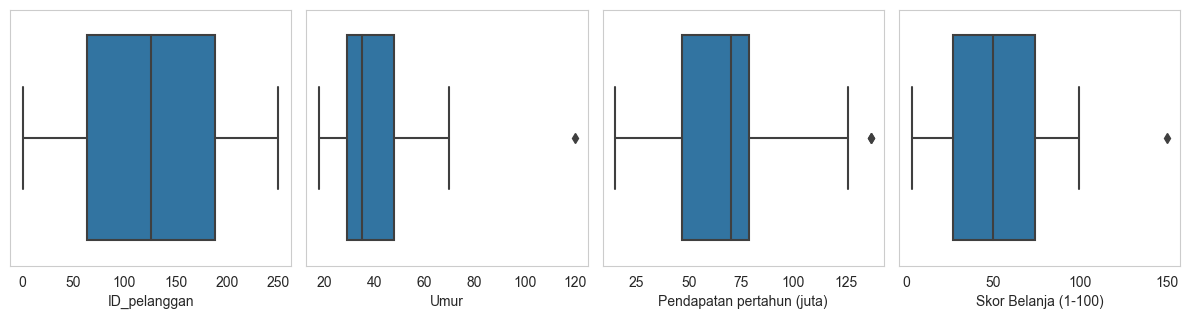

In [92]:
#code here

# Visualisasi menggunakan Boxplot

plt.figure(figsize=(12,6))
for i, col in enumerate(df2.describe().columns):
    plt.subplot(2,4, i+1)
    sns.boxplot(x = df2[col])
    plt.tight_layout()
    
plt.show()


In [6]:
# Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
def get_outliers(Outlier):
    
    outliers_index=[]
    for col in Outlier.describe().columns:
        
        Q1 = Outlier[col].quantile(0.25)
        Q3 = Outlier[col].quantile(0.75)
        IQR = Q3 - Q1
        
        Atas = Q3 + (1.5 * IQR)
        Bawah = Q1 - (1.5 * IQR)
        
        outliers = Outlier[(df2[col] < Bawah) | (Outlier[col] > Atas)].index
        outliers_index.extend(outliers.to_list())
        
    outliers_index = set(outliers_index)
    outliers_index = list(outliers_index)
    outliers_index.sort()
    
    return outliers_index



In [7]:
# Hapuslah data missing tersebut dengan menggunakan method .dropna()

df2.dropna()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


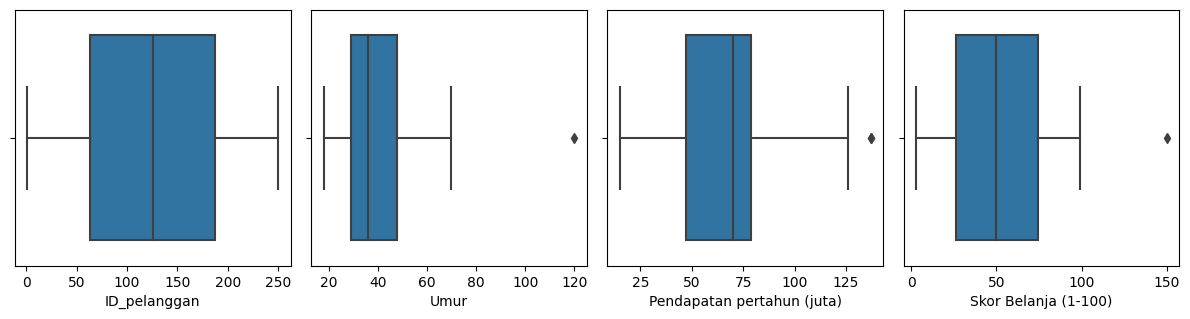

In [8]:
plt.figure(figsize=(12,6))
for i, col in enumerate(df.describe().columns):
    plt.subplot(2,4, i+1)
    sns.boxplot(x = df[col])
    plt.tight_layout()

plt.show()


**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [89]:
df_100 = df2.sample(100, random_state=1)
display(df_100)

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
67,68,Perempuan,68.0,48,48.0
249,250,Laki-laki,120.0,98,15.0
230,231,Perempuan,31.0,81,93.0
161,162,Perempuan,29.0,79,83.0
91,92,Laki-laki,18.0,59,41.0
...,...,...,...,...,...
17,18,Laki-laki,20.0,21,66.0
5,6,Perempuan,22.0,17,76.0
185,186,Laki-laki,30.0,99,97.0
106,107,Perempuan,66.0,63,50.0


In [10]:
#code here for z-test


In [11]:
#code here for p-value

Give your analysis:



---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

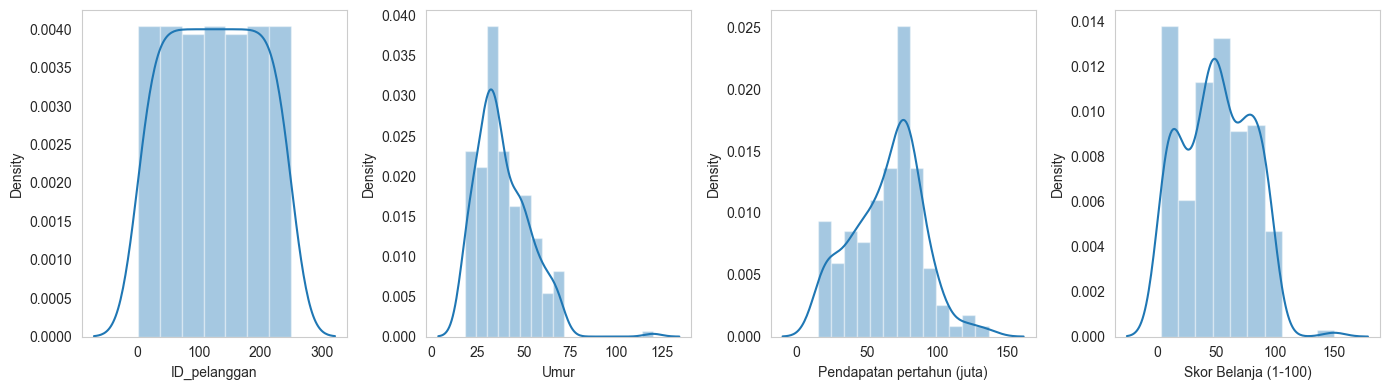

In [51]:
#code here for univariate

plt.figure(figsize=(14,4))
sns.set_style("whitegrid", {'axes.grid' : False})
for i, col in enumerate(df.describe().columns):
    plt.subplot(1,4, i+1)
    sns.distplot(x = df[col], axlabel = col)
    plt.tight_layout()

plt.show()

Give your analysis:

In [13]:
#code here for bivariate
Rank = df.sort_values(by='Skor Belanja (1-100)', ascending=False)

Lima_Teratas = Rank.head()
Lima_Terbawah = Rank.tail()

display(Lima_Teratas)
display(Lima_Terbawah)


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


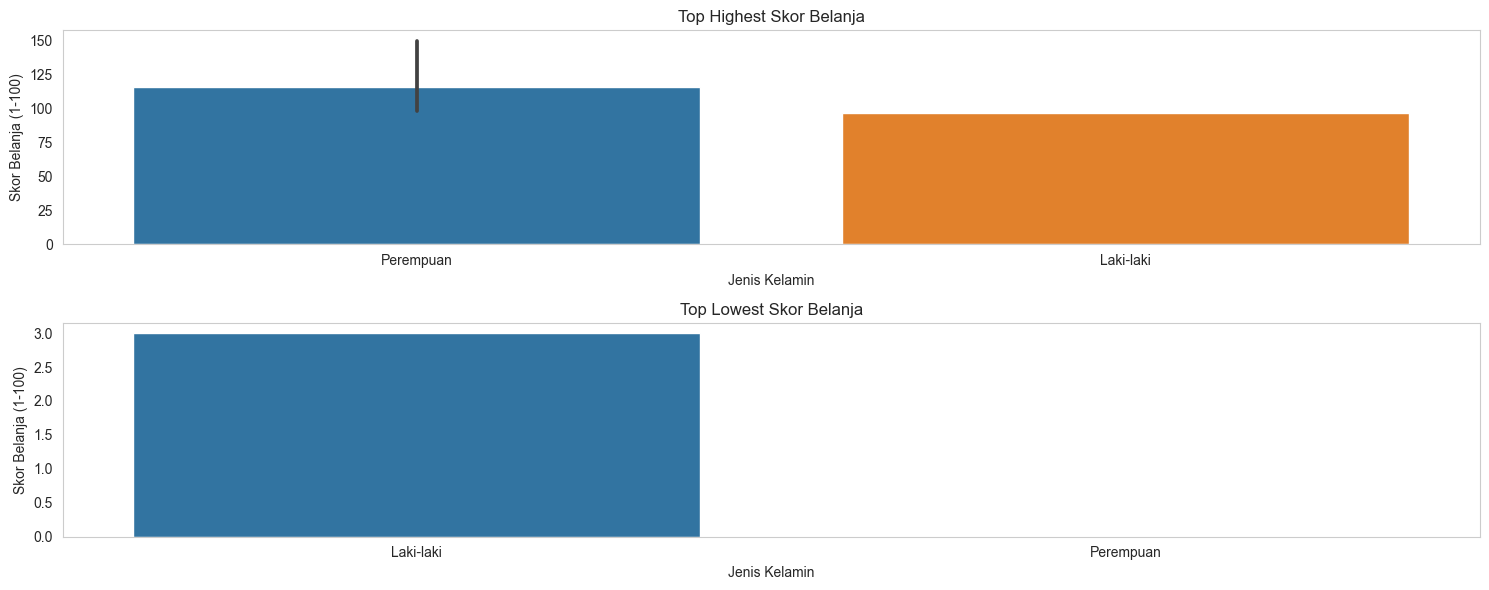

In [14]:
# bivariate
fig, ax = plt.subplots(2, 1, figsize=(15,6))
sns.barplot(x ='Jenis Kelamin', y = 'Skor Belanja (1-100)', data=Lima_Teratas, ax=ax[0]).set(title='Top Highest Skor Belanja')
sns.barplot(x ='Jenis Kelamin', y = 'Skor Belanja (1-100)', data=Lima_Terbawah, ax=ax[1]).set(title='Top Lowest Skor Belanja')
plt.tight_layout()
plt.show()

Give your analysis:

Dari grafik yang ditampilkan bahwa pelanggan supermarket paling banyak adalah Perempuan, dan paling sedikit adalah Laki-laki.

<AxesSubplot:>

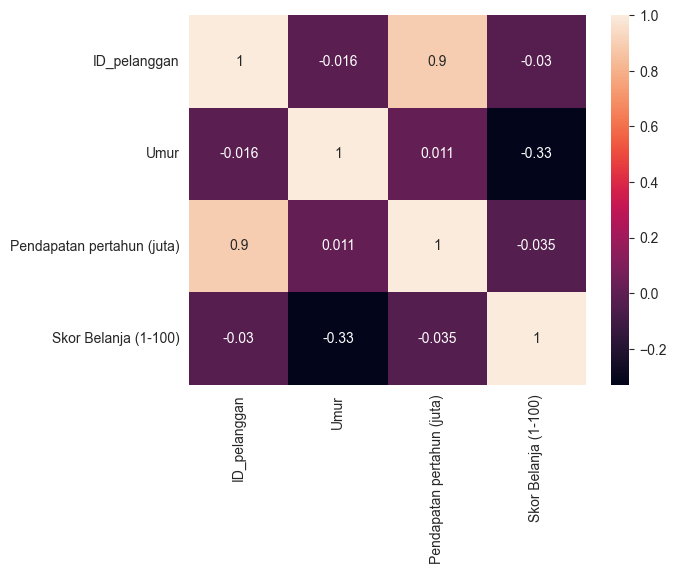

In [15]:
#code here for multivariate
sns.heatmap(df[['ID_pelanggan', 
                'Umur', 
                'Pendapatan pertahun (juta)', 
                'Skor Belanja (1-100)']].corr(), annot=True, fmt='.2g')

Give your analysis:

**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/uc?id=1JI_NM4Nr-ZN1aszv0m-iL46Qm0xNLFw3)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [16]:
#code here
df_ScalingData = df2[['Umur', 'Skor Belanja (1-100)']].copy()
# df_ScalingData

# Scaling

SSCale = StandardScaler()
Scale_Data = SSCale.fit_transform(df_ScalingData)
# Scale_Data

Scaling_Data = pd.DataFrame(Scale_Data, columns=['Umur', 'Skor Belanja (1-100)'])
Scaling_Data

,Umur,Skor Belanja (1-100)
0,-1.382782,-0.395939
1,-1.241768,1.083022
2,-1.312275,-1.557980
3,-1.100755,0.942168
4,-0.536699,-0.360726
...,...,...
245,1.437496,-1.276273
246,-0.254671,1.399942
247,-0.113657,-0.642432
248,-0.466192,1.259089




---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [74]:
#code here 
# Clustering k=2
from sklearn.cluster import KMeans

k2 = KMeans(n_clusters=2).fit(Scaling_Data)
Scaling_Data['CL_k2'] = k2.labels_

Centroid_k2 = k2.cluster_centers_
CentroidX_k2 = Centroid_k2[:,0]
CentroidY_k2 = Centroid_k2[:,1]

print(CentroidX_k2, CentroidY_k2)


[ 0.61819401 -0.65906634] [-0.75298597  0.80277016]


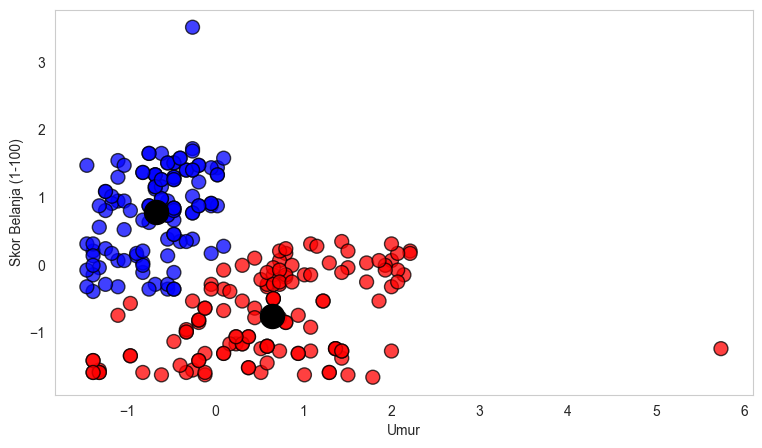

In [84]:
#code here
# Visualisasi k=2

fig, ax = plt.subplots(figsize=(9,5))

colorDict = {0 :'red', 1: 'blue'}

# Plot data
ax.scatter(Scaling_Data['Umur'], Scaling_Data["Skor Belanja (1-100)"],
            s=100,
            c= Scaling_Data['CL_k2'].map(colorDict), alpha = 0.75, zorder=2,
            edgecolors= "black")

# Plot centroid
ax.scatter(centroidX_k2, centroidY_k2,
            s=300,
            c='black', marker='o', zorder=3)

# Label Scatterplot
ax.set_xlabel('Umur')
ax.set_ylabel('Skor Belanja (1-100)')

plt.show()

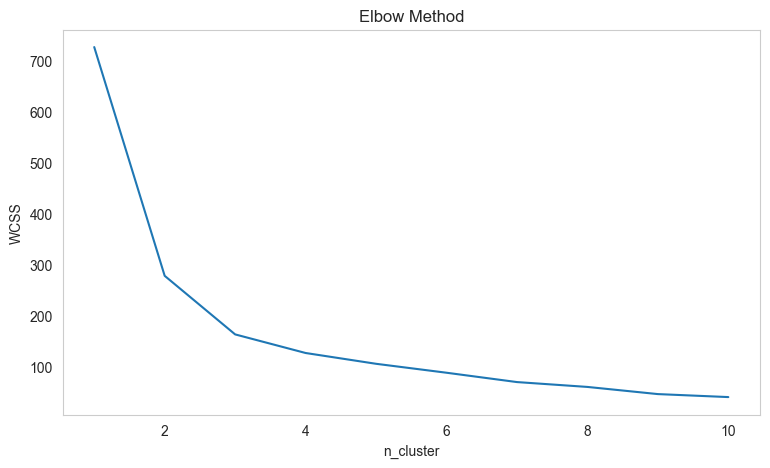

In [76]:
# Elbow Method 
def elbowMethod (X, k_min=1, k_max=10, save=False):
    k_range = range(k_min, k_max+1)
    
    result = []
    for k in k_range:
        model = KMeans(n_clusters=k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(9,5))
    
    ax.plot(k_range, result)

elbowMethod(Scaling_Data)

plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('WCSS')
plt.show()

In [77]:
# Clustering n=3

k3 = KMeans(n_clusters=3).fit(Scaling_Data)
Scaling_Data['CL_k3'] = k3.labels_

Centroid_k3 = k3.cluster_centers_
CentroidX_k3 = Centroid_k3[:,0]
CentroidY_k3 = Centroid_k3[:,1]

print(CentroidX_k3, CentroidY_k3)

[-0.65906634 -0.17101879  1.28338766] [ 0.80277016 -1.12407947 -0.44020716]


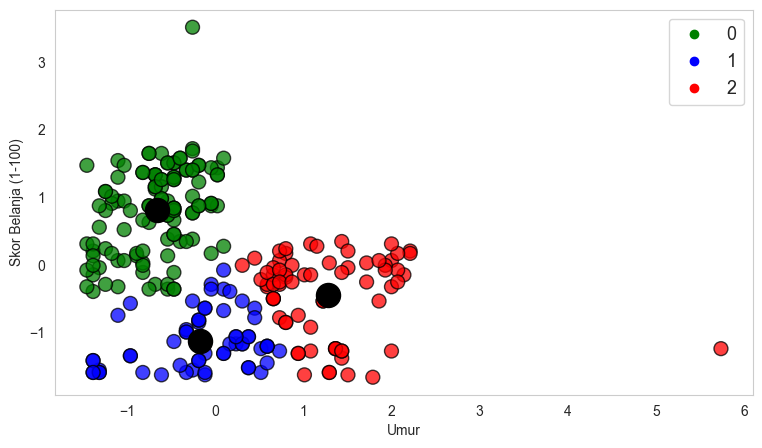

In [88]:
# Visualisasi k=3

fig, ax = plt.subplots(figsize=(9,5))

colorDict = {0 :'green', 1 :'blue', 2: 'red'}

# Plot Data
ax.scatter(Scaling_Data['Umur'], Scaling_Data["Skor Belanja (1-100)"],
        s=100,
        c= Scaling_Data['CL_k3'].map(colorDict), alpha = 0.75, zorder=2,
        edgecolors= "black")

# Plot Centroid
ax.scatter(CentroidX_k3, CentroidY_k3,
        s=300,
        c='black', marker='o', zorder=3)

# Label Diagram
ax.set_xlabel('Umur')
ax.set_ylabel('Skor Belanja (1-100)')

# Set Legend
markers = [ plt.Line2D( [0,0],[0,0], color = color, marker='o', linestyle='' ) for color in colorDict.values() ]
plt.legend(markers, list(colorDict.keys())[:4], prop={'size': 13})

plt.show()

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [93]:
# Silhoutte Score
from sklearn.metrics import silhouette_score

label2 = k2.labels_
label3 = k3.labels_

print(silhouette_score(Scaling_Data, labels = label2))
print(silhouette_score(Scaling_Data, labels = label3))


0.5781801118442784
0.5657737779372465




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket